In [57]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [58]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [59]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

In [60]:
age_hist = thinkstats2.Hist((df["Age"]), label='Age')
age_hist

Hist({29: 660, 28: 649, 27: 584, 26: 583, 25: 547, 24: 523, 21: 505, 23: 503, 18: 476, 22: 470, 32: 470, 30: 467, 19: 465, 31: 458, 33: 454, 20: 454, 34: 426, 17: 395, 35: 386, 36: 363, 38: 346, 16: 338, 37: 336, 39: 323, 51: 314, 40: 312, 41: 312, 47: 310, 45: 310, 42: 309, 55: 307, 50: 306, 48: 303, 53: 300, 49: 297, 52: 294, 46: 293, 44: 290, 43: 284, 54: 270}, 'Age')

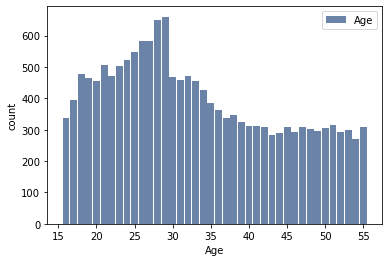

In [61]:
thinkplot.Hist(age_hist)
thinkplot.Config(xlabel='Age', ylabel='count')

#### What fraction of the people in the data are 51? What fraction are older than 51?

In [62]:
age_list = df[df['Age'] == 51 ]
age_list.value_counts()

Age  Eduacation          Race      Hisp         MaritalStatus  Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
51   HighSchool          NotBlack  NotHispanic  Married        0      25862.320      25243.550      25564.670        22
     LessThanHighSchool  NotBlack  NotHispanic  Married        1      25862.320      25243.550      25564.670        10
     graduate            NotBlack  NotHispanic  Married        0      25862.320      25243.550      25564.670         9
     HighSchool          NotBlack  NotHispanic  Married        0      0.000          0.000          0.000             6
     Intermediate        NotBlack  NotHispanic  Married        0      25862.320      25243.550      25564.670         6
                                                                                                                     ..
     HighSchool          NotBlack  NotHispanic  NotMarried     0      19496.660      17043.870      17243.590         1
                                              

In [63]:
age_list = df[df['Age'] > 51 ]
age_list.value_counts()

Age  Eduacation          Race      Hisp         MaritalStatus  Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
54   HighSchool          NotBlack  NotHispanic  Married        0      25862.320      25243.55       25564.670        19
52   HighSchool          NotBlack  NotHispanic  Married        0      25862.320      25243.55       25564.670        18
53   HighSchool          NotBlack  NotHispanic  Married        0      25862.320      25243.55       25564.670        18
55   HighSchool          NotBlack  NotHispanic  Married        0      25862.320      25243.55       25564.670        17
     LessThanHighSchool  NotBlack  NotHispanic  Married        1      25862.320      25243.55       25564.670        15
                                                                                                                     ..
53   Intermediate        NotBlack  NotHispanic  Married        0      25862.320      25243.55       23989.410         1
                                              

##### What is the median age?

In [64]:
df['Age'].median ( )

31.0

##### Does the distribution of the sample data seem to mirror the working age population?

no, it seems not enough information.

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [65]:
print(df.groupby(['Eduacation']).value_counts())

Eduacation  Age  Race      Hisp         MaritalStatus  Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
HighSchool  33   NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         35
            32   NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         31
            34   NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         28
            43   NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         27
            29   NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         26
                                                                                                             ..
graduate    28   NotBlack  NotHispanic  NotMarried     0      16628.30       24740.47       21740.31          1
                                                              16914.35       12344.27       25564.67          

In [66]:
print(df.groupby(['Race']).value_counts())


Race      Age  Eduacation          Hisp         MaritalStatus  Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
NotBlack  33   HighSchool          NotHispanic  Married        0      25862.3200     25243.550      25564.670        35
          32   HighSchool          NotHispanic  Married        0      25862.3200     25243.550      25564.670        31
          34   HighSchool          NotHispanic  Married        0      25862.3200     25243.550      25564.670        28
          43   HighSchool          NotHispanic  Married        0      25862.3200     25243.550      25564.670        27
          29   HighSchool          NotHispanic  Married        0      25862.3200     25243.550      25564.670        26
                                                                                                                     ..
black     30   Intermediate        NotHispanic  Married        0      10278.3100     9553.161       12811.890         1
                                              

In [67]:
print(df.groupby(['Hisp']).value_counts())


Hisp         Age  Eduacation          Race      MaritalStatus  Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
NotHispanic  33   HighSchool          NotBlack  Married        0      25862.32       25243.55       25564.670        35
             32   HighSchool          NotBlack  Married        0      25862.32       25243.55       25564.670        31
             34   HighSchool          NotBlack  Married        0      25862.32       25243.55       25564.670        28
             43   HighSchool          NotBlack  Married        0      25862.32       25243.55       25564.670        27
             42   HighSchool          NotBlack  Married        0      25862.32       25243.55       25564.670        26
                                                                                                                     ..
hispanic     31   LessThanHighSchool  NotBlack  Married        1      20327.39       18964.89       4028.283          1
                                              

In [68]:
print(df.groupby(['MaritalStatus']).value_counts())


MaritalStatus  Age  Eduacation    Race      Hisp         Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
Married        33   HighSchool    NotBlack  NotHispanic  0      25862.32       25243.55       25564.670        35
               32   HighSchool    NotBlack  NotHispanic  0      25862.32       25243.55       25564.670        31
               34   HighSchool    NotBlack  NotHispanic  0      25862.32       25243.55       25564.670        28
               43   HighSchool    NotBlack  NotHispanic  0      25862.32       25243.55       25564.670        27
               38   HighSchool    NotBlack  NotHispanic  0      25862.32       25243.55       25564.670        26
                                                                                                               ..
NotMarried     21   Intermediate  NotBlack  NotHispanic  0      11081.61       12206.42       18842.490         1
                                                                11181.54       10530.68       

In [69]:
print(df.groupby(['Nodeg']).value_counts())

Nodeg  Age  Eduacation          Race      Hisp         MaritalStatus  Earnings_1974  Earnings_1975  Earnings_1978
0      33   HighSchool          NotBlack  NotHispanic  Married        25862.32       25243.55       25564.670        35
       32   HighSchool          NotBlack  NotHispanic  Married        25862.32       25243.55       25564.670        31
       34   HighSchool          NotBlack  NotHispanic  Married        25862.32       25243.55       25564.670        28
       43   HighSchool          NotBlack  NotHispanic  Married        25862.32       25243.55       25564.670        27
       38   HighSchool          NotBlack  NotHispanic  Married        25862.32       25243.55       25564.670        26
                                                                                                                     ..
1      31   LessThanHighSchool  NotBlack  hispanic     Married        25862.32       25243.55       25564.670         1
                                              

##### Demographic Conclusion

Part 3 - Earnings

1 Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.

    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?




2 Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>




3 Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.


    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>



4 Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <li>What can you infer from the presence of outliers that may impact analysis of this data.


##### Plot Earnings Data

<AxesSubplot:xlabel='Earnings_1974', ylabel='Count'>

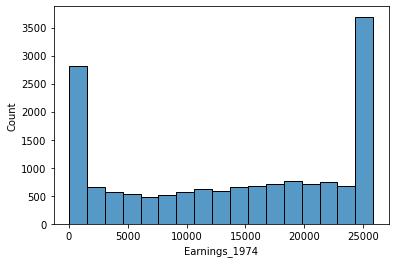

In [70]:
df_1974 = pd.read_csv("LabourTrainingEvaluationData.csv")
sns.histplot(df_1974['Earnings_1974'])

<AxesSubplot:xlabel='Earnings_1975', ylabel='Count'>

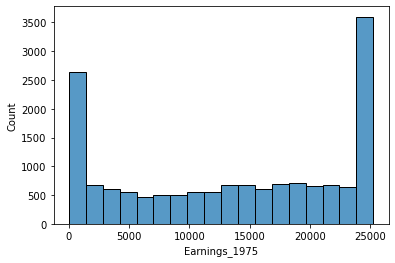

In [71]:
df_1975 = pd.read_csv("LabourTrainingEvaluationData.csv")
sns.histplot(df_1975['Earnings_1975'])

<AxesSubplot:xlabel='Earnings_1978', ylabel='Count'>

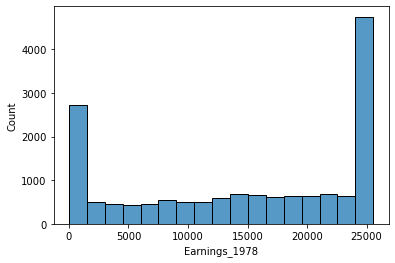

In [72]:
df_1978 = pd.read_csv("LabourTrainingEvaluationData.csv")
sns.histplot(df_1978['Earnings_1978'])

c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

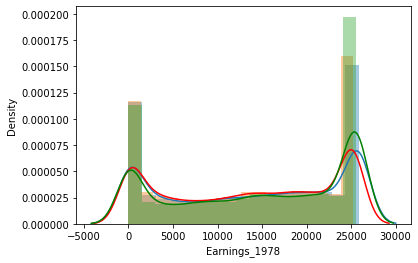

In [73]:
sns.distplot(df['Earnings_1974'], kde_kws = {'label' : '1974 Earning'}, hist_kws = {'label' : 'Total'})
sns.distplot(df['Earnings_1975'], kde_kws = {'label' : '1975 Earning', 'color' : 'red'})
sns.distplot(df['Earnings_1978'], kde_kws = {'label' : '1978 Earning', 'color' : 'green'})
plt.show()

As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 

##### What to Investigate Further


##### Histogram and PMF

In [74]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

(array([2666.,  409.,  397.,  376.,  377.,  380.,  474.,  416.,  438.,
         456.,  544.,  579.,  560.,  527.,  507.,  543.,  597.,  562.,
         532., 4652.]),
 array([    0.    ,  1278.2335,  2556.467 ,  3834.7005,  5112.934 ,
         6391.1675,  7669.401 ,  8947.6345, 10225.868 , 11504.1015,
        12782.335 , 14060.5685, 15338.802 , 16617.0355, 17895.269 ,
        19173.5025, 20451.736 , 21729.9695, 23008.203 , 24286.4365,
        25564.67  ]),
 <BarContainer object of 20 artists>)

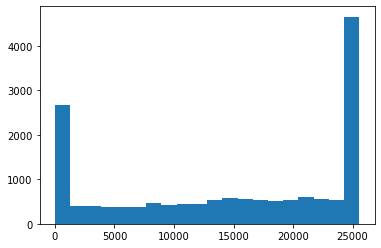

In [75]:
pmf_1978 = thinkstats2.Pmf(df_1978)
plt.hist(df['Earnings_1978'], bins=20)

##### Differences in Median Income, and Theory on Why


##### Outliers

In [90]:
df = df_1978[df_1978['Earnings_1978'] > 5000]
df = df_1978[df_1978['Earnings_1978'] < 23000]
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,10806.000000,10806.000000,10806.000000,10806.000000,10806.000000
mean,31.777346,0.350916,10234.472110,9850.718083,9827.610646
std,11.442488,0.477279,8530.998774,8121.745450,7737.838732
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,1516.962750,1767.048000,1426.005750
50%,29.000000,0.000000,9641.552000,9184.355000,9938.450000
75%,41.000000,1.000000,17335.590000,16521.100000,16699.420000
max,55.000000,1.000000,25862.320000,25243.550000,22996.380000


##### Outlier Conclusions


1. In 1974, 1975 and 1978, the income showed very steadly. 
2. In these years, all presented there were a few extreme low and high income in data.
3. It could esteadilybetter, if there has more incomes of years in data.
